In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import scipy.stats as stats

In [58]:
df=pd.read_csv('/content/cleaned_list.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              215 non-null    object
 1   Internet Users       215 non-null    int64 
 2   Population           215 non-null    int64 
 3   Population rank      215 non-null    int64 
 4   Percentage           215 non-null    int64 
 5   Internet users rank  215 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.2+ KB


Which countries have the highest and lowest percentages of internet users?

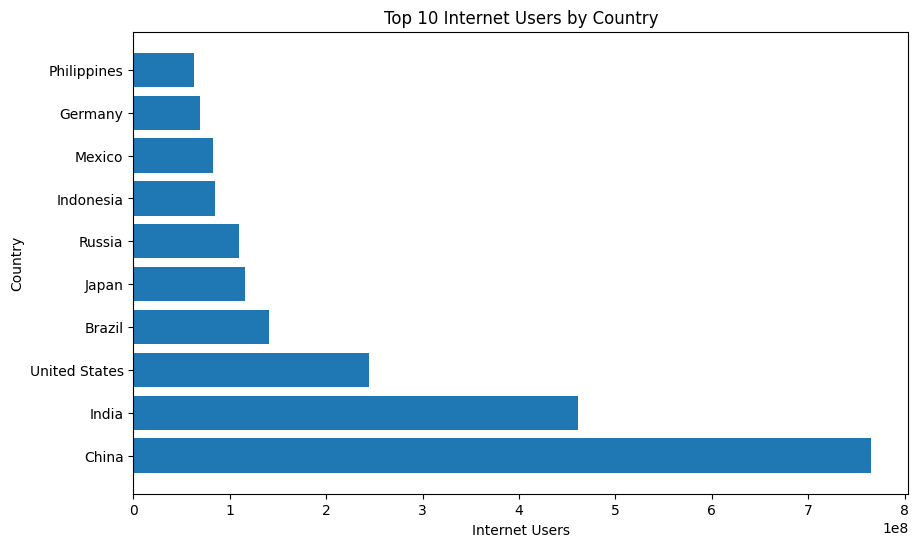

In [60]:
# Sort the DataFrame by 'Internet Users' in descending order
df_sorted = df.sort_values(by='Internet Users', ascending=False)

# Select the top 10 countries
top_10_df = df_sorted.head(10)

# Create a horizontal bar chart for the top 10 countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_df['Country'], top_10_df['Internet Users'])
plt.title("Top 10 Internet Users by Country")
plt.xlabel("Internet Users")
plt.ylabel("Country")
plt.show()


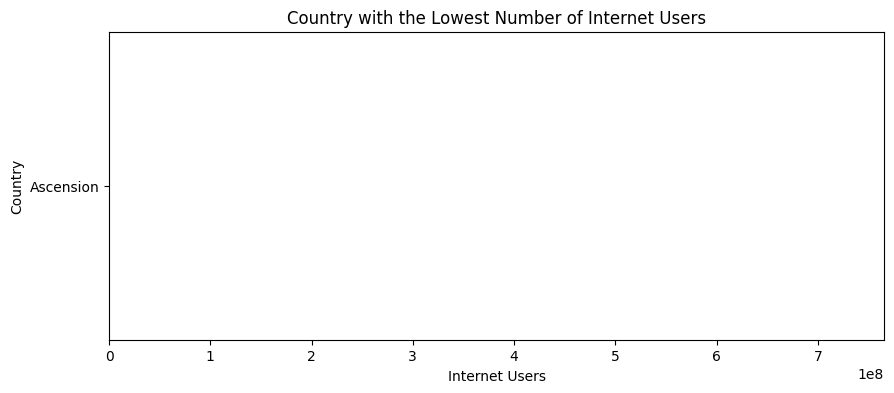

In [61]:
# Find the country with the lowest number of internet users
lowest_country = df['Country'][df['Internet Users'].idxmin()]

# Create a horizontal bar chart to display the lowest country
plt.figure(figsize=(10, 4))
plt.barh(lowest_country, df['Internet Users'].min())
plt.title("Country with the Lowest Number of Internet Users")
plt.xlabel("Internet Users")
plt.ylabel("Country")
plt.xlim(0, df['Internet Users'].max())  # Set x-axis limit
plt.show()


What is the distribution of internet users among countries?


In [62]:
# Create a scatter plot on a map
fig = px.scatter_geo(df, locations="Country", locationmode="country names", color="Internet Users",
                     hover_name="Country", size="Internet Users", projection="natural earth")

# Customize the appearance of the map
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Set the title
fig.update_layout(title="Distribution of Internet Users by Country")

# Show the plot
fig.show()


What are the top 10 country by population?

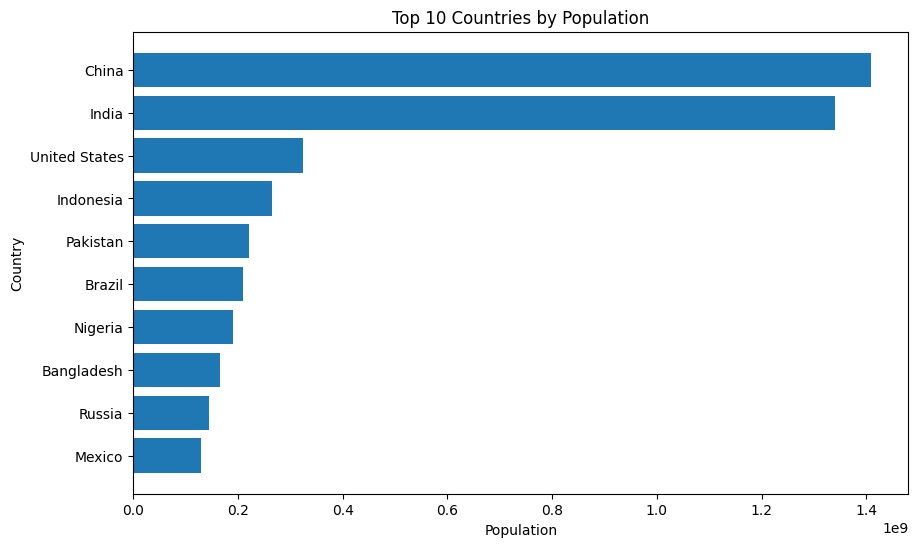

In [63]:
# Sort the DataFrame by 'Population' in descending order
df_sorted = df.sort_values(by='Population', ascending=False)

# Select the top 10 countries
top_10_countries = df_sorted.head(10)

# Create a horizontal bar chart for the top 10 countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country'], top_10_countries['Population'])
plt.title("Top 10 Countries by Population")
plt.xlabel("Population")
plt.ylabel("Country")
plt.xticks(rotation=0)  # Remove x-axis rotation for country names
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest population at the top
plt.show()


 What is the distribution of populations among countries?

In [64]:
# Create a choropleth map
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Population",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth")

# Set the title
fig.update_layout(title="Population Distribution by Country")

# Show the plot
fig.show()


What percentage of a Country's population are internet users?

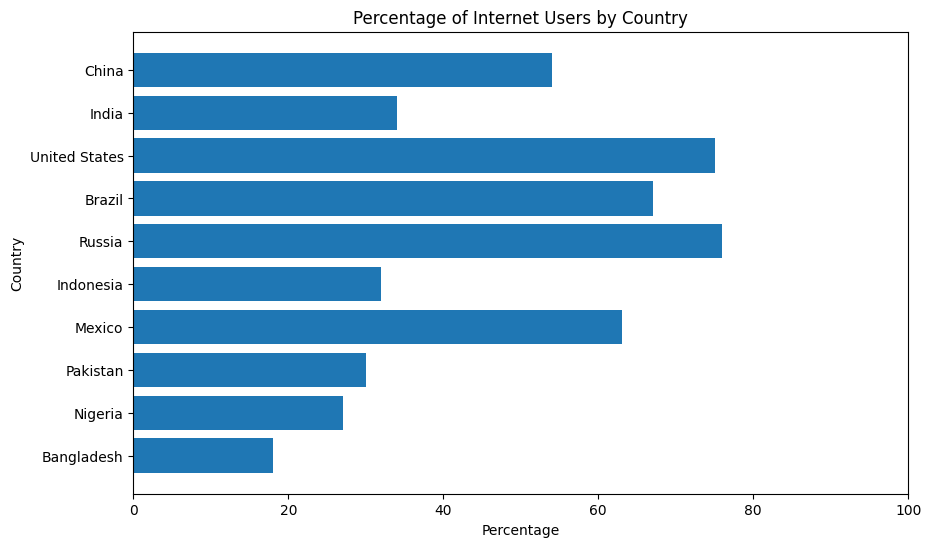

In [65]:
# List of countries to include in the chart
countries = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']

# Filter the DataFrame to include only the selected countries
selected_countries = df[df['Country'].isin(countries)]

# Create a horizontal bar chart for the selected countries
plt.figure(figsize=(10, 6))
plt.barh(selected_countries['Country'], selected_countries['Percentage'])
plt.title("Percentage of Internet Users by Country")
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.xlim(0, 100)  # Set x-axis limit
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


Is the relationship between the target variable and other variables statistically significant?

In [66]:
# Define your target variable and predictor variable
target_variable = df['Internet Users']
predictor_variable = df['Population']

# Perform a Pearson correlation test
corr_coefficient, p_value = stats.pearsonr(target_variable, predictor_variable)

# Set your significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")

# Check the significance
if p_value < alpha:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")


Pearson Correlation Coefficient: 0.9598
P-Value: 0.0000
The relationship is statistically significant.
